### Importing useful packages and loading BindingDB dataset:

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import requests
import re
import lxml
from bs4 import BeautifulSoup
import sys
import os
import json
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

from src.scripts.citations import get_citations
from src.scripts.disease_plotting import load_uniprotid_diseases
from src.scripts.disease_plotting import add_keywords_when_comments_missing
from src.scripts.disease_plotting import weigh_each_comment
from src.scripts.disease_plotting import sort_diseases
from src.scripts.citations import calculate_H_index_diseases
from src.scripts.citations import timeseries_citations_diseases
from src.scripts.citations import get_patent_info

In [25]:
BINDING_DATASET = "../data/BindingDB_All.tsv"

In [26]:
# Only loading columns of interest for this part :
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    #'Ki (nM)',
    #'IC50 (nM)',
    #'Kd (nM)',
    #'EC50 (nM)',
    #'kon (M-1-s-1)',
    #'koff (s-1)',
    # 'pH',
    # 'Temp (C)',
    # "Curation/DataSource",
    "Article DOI",
    # 'BindingDB Entry DOI',
    # 'PMID',
    # 'PubChem AID',
    "Patent Number",
    # "Authors",
    # "Institution",
    # 'Link to Ligand in BindingDB',
    # 'Link to Target in BindingDB',
    # 'Link to Ligand-Target Pair in BindingDB',
    # 'Ligand HET ID in PDB',
    # 'PDB ID(s) for Ligand-Target Complex',
    # 'PubChem CID',
    # 'PubChem SID',
    #'ChEBI ID of Ligand',
    #'ChEMBL ID of Ligand',
    #'DrugBank ID of Ligand',
    #'IUPHAR_GRAC ID of Ligand',
    #'KEGG ID of Ligand',
    #'ZINC ID of Ligand',
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    #'UniProt (TrEMBL) Primary ID of Target Chain',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [4]:
bindingDB = pd.read_csv(BINDING_DATASET, sep="\t", on_bad_lines="skip", usecols=usecols)

### Investigating citations from Article DOI:

#### On all dataset:

In [5]:
doi = bindingDB["Article DOI"].value_counts()
unique_doi_ordered = doi.index.tolist()

In [6]:
with open("../src/data/citations.json", "r") as f:
    citations = json.load(f)

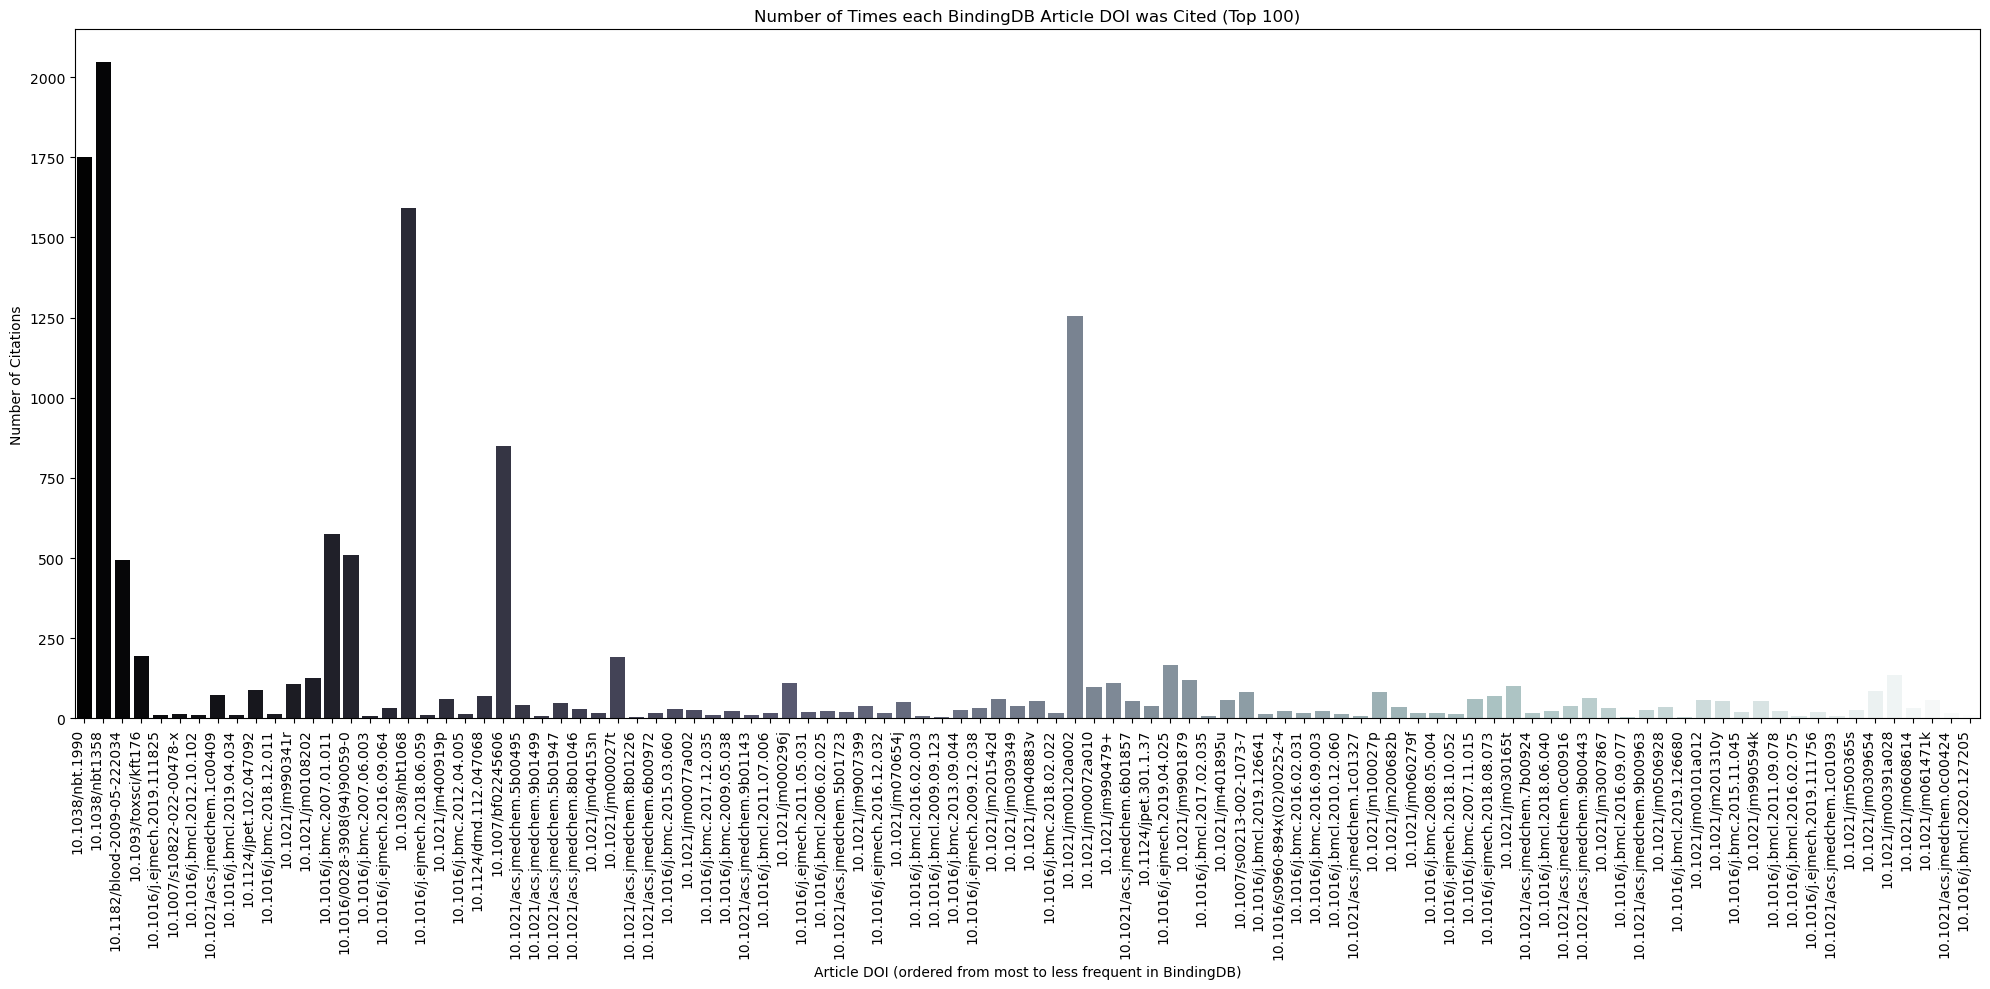

In [7]:
citations_df = pd.DataFrame(citations[0:100])
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="bone")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less frequent in BindingDB)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

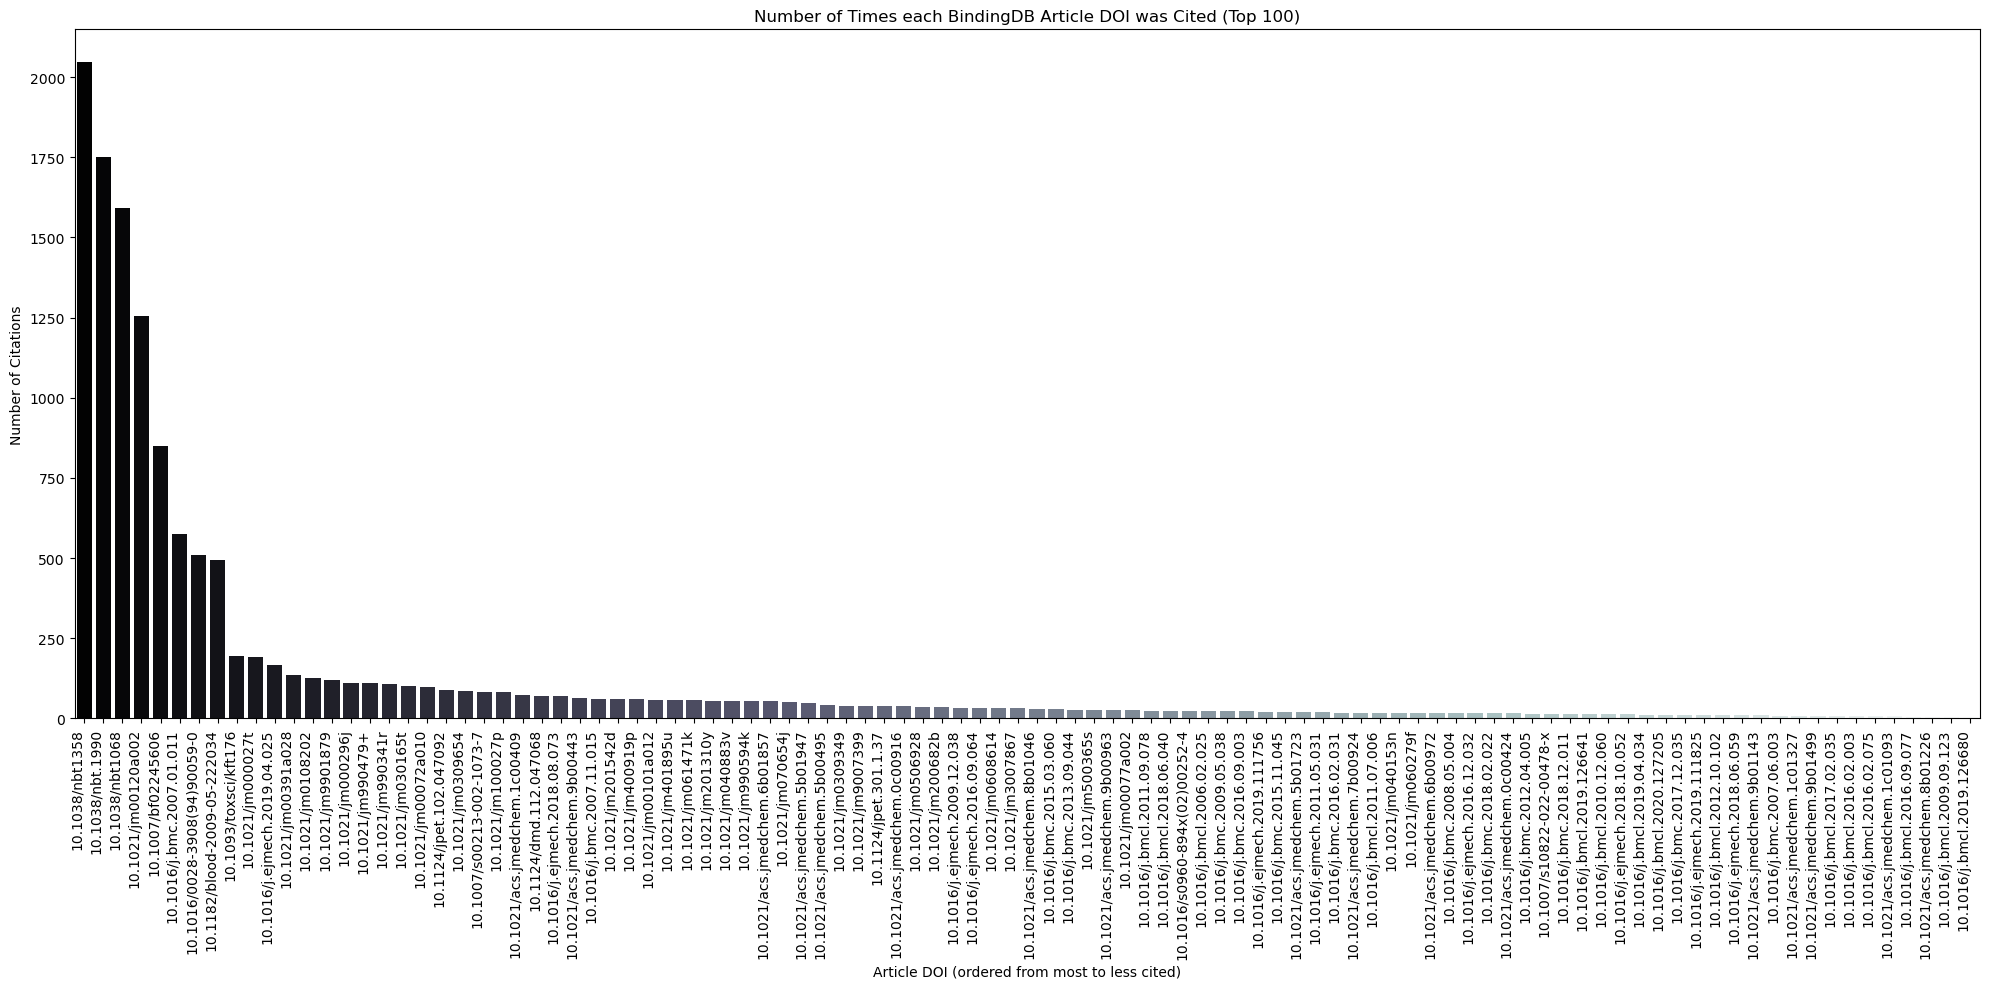

In [8]:
citations_df = pd.DataFrame(citations[0:100])
citations_df = citations_df.sort_values(by="citation", ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="bone")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less cited)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

#### Depending on Diseases:

In [9]:
file_path = "../src/data/UniprotID_disases.json"
absolute_path = os.path.abspath(file_path)
disease_data = load_uniprotid_diseases(absolute_path)
disease_data = add_keywords_when_comments_missing(disease_data)
disease_data = weigh_each_comment(bindingDB, disease_data)
diseases = (
    bindingDB.merge(
        disease_data[
            ["UniProt (SwissProt) Primary ID of Target Chain", "comments_bfill"]
        ],
        how="inner",
    )
    .dropna(subset="comments_bfill")
    .explode("comments_bfill")[
        ["UniProt (SwissProt) Primary ID of Target Chain", "comments_bfill"]
    ]
)
diseases["Disease Classes"] = diseases["comments_bfill"].apply(sort_diseases)

In [10]:
disease_uniprot_mapping = (
    diseases.groupby("Disease Classes")[
        "UniProt (SwissProt) Primary ID of Target Chain"
    ]
    .apply(list)
    .reset_index()
)
disease_uniprot_mapping[
    "UniProt (SwissProt) Primary ID of Target Chain"
] = disease_uniprot_mapping["UniProt (SwissProt) Primary ID of Target Chain"].apply(
    lambda x: list(set(x))
)

In [11]:
disease_uniprot_mapping_exploded = disease_uniprot_mapping.explode(
    "UniProt (SwissProt) Primary ID of Target Chain"
)
bindingDB = bindingDB.dropna(subset=["Article DOI"])
merged_data = bindingDB.merge(
    disease_uniprot_mapping_exploded[
        ["Disease Classes", "UniProt (SwissProt) Primary ID of Target Chain"]
    ],
    how="inner",
    on="UniProt (SwissProt) Primary ID of Target Chain",
)
disease_dois = (
    merged_data.groupby("Disease Classes")["Article DOI"].apply(list).reset_index()
)
disease_dois["Article DOI"] = disease_dois["Article DOI"].apply(lambda x: list(set(x)))
disease_dois["Article Count"] = disease_dois["Article DOI"].apply(len)
disease_dois = disease_dois.sort_values(by="Article Count", ascending=False)

In [12]:
citations_dict = {item["doi"]: item["citation"] for item in citations}
disease_citations = []
for index, row in disease_dois.iterrows():
    disease_class = row["Disease Classes"]
    dois = row["Article DOI"]
    total_citations = 0
    for doi in dois:
        citation_count = citations_dict.get(doi, 0)  # 0 if DOI not found
        if citation_count != None:
            total_citations += citation_count
    disease_citations.append(
        {"Disease Classes": disease_class, "Total Citations": total_citations}
    )
disease_citations_df = pd.DataFrame(disease_citations)

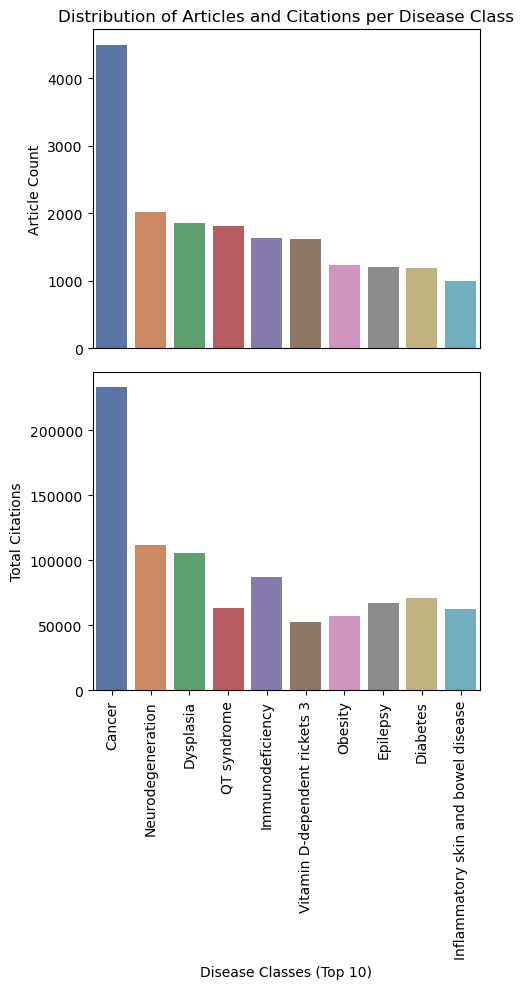

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
sns.barplot(
    data=disease_dois[0:10],
    x="Disease Classes",
    y="Article Count",
    palette="deep",
    ax=axes[0],
)
axes[0].set_title("Distribution of Articles and Citations per Disease Class")
axes[0].tick_params(axis="x", which="both", bottom=False)

sns.barplot(
    data=disease_citations_df.head(10),
    x="Disease Classes",
    y="Total Citations",
    palette="deep",
    ax=axes[1],
)
axes[1].set_xlabel("Disease Classes (Top 10)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

In [14]:
colors = sns.color_palette("Blues", 2).as_hex()

fig = go.Figure()
fig.add_trace(
    go.Bar(
        y=disease_citations_df['Disease Classes'][0:10],
        x=disease_citations_df['Total Citations'][0:10],
        name='Total Citations',
        orientation='h',
        marker=dict(color=colors[0]),
        offsetgroup=1
    )
)
fig.add_trace(
    go.Bar(
        y=disease_dois['Disease Classes'][0:10],
        x=disease_dois['Article Count'][0:10],
        name='Article Count',
        orientation='h',
        marker=dict(color=colors[1]),
        offsetgroup=2,
        xaxis='x2'
    )
)
fig.update_layout(
    title="Distribution of Articles and Citations per Disease Class",
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(
        title="Disease Classes",
        categoryorder="array",
        categoryarray=disease_citations_df['Disease Classes'][0:10][::-1] 
    ),
    xaxis=dict(
        title="Total Citations",
        titlefont=dict(color=colors[0]),
        tickfont=dict(color=colors[0])
    ),
    xaxis2=dict(
        title="Article Count",
        titlefont=dict(color=colors[1]),
        tickfont=dict(color=colors[1]),
        overlaying='x', 
        side='top',
        position=1
    ),
    barmode='group',
    legend=dict(x=1, y=1, traceorder='normal', orientation='v'),
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template='plotly_dark'
)
fig.show()

In [15]:
# custom_style = """
# <style>
#   body, html {
#     background-color: rgb(34, 37, 41);
#   }
# </style>
# """

# # Save the HTML file and inject the custom style
# html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# # Insert the style in the <head>
# html_content = html_content.replace("</head>", f"{custom_style}</head>")

# # Write to a file
# with open("Citations_per_Disease.html", "w") as f:
#     f.write(html_content)
# fig.write_image("Citations_per_Disease.svg")

In [16]:
disease_citations_df = disease_citations_df.merge(disease_dois, on="Disease Classes")
disease_citations_df["Mean Citation per Article"] = (
    disease_citations_df["Total Citations"] / disease_citations_df["Article Count"]
)

In [17]:
fig = px.bar(
    disease_citations_df[0:10],
    x="Mean Citation per Article",
    y="Disease Classes",
    orientation='h',
    title="Mean Citations per Article per Disease Class",
    log_x=True
)
fig.update_layout(
    yaxis_title="Disease Classes",
    title_x=0.5,
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark"
)
fig.update_yaxes(categoryorder="total ascending")
fig.show()

### h index :

A researcher has an h-index of h if h of their papers have at least h citations each, and the remaining papers have ≤h citations.

In [18]:
disease_h_index_df = calculate_H_index_diseases(disease_citations_df, citations_dict)

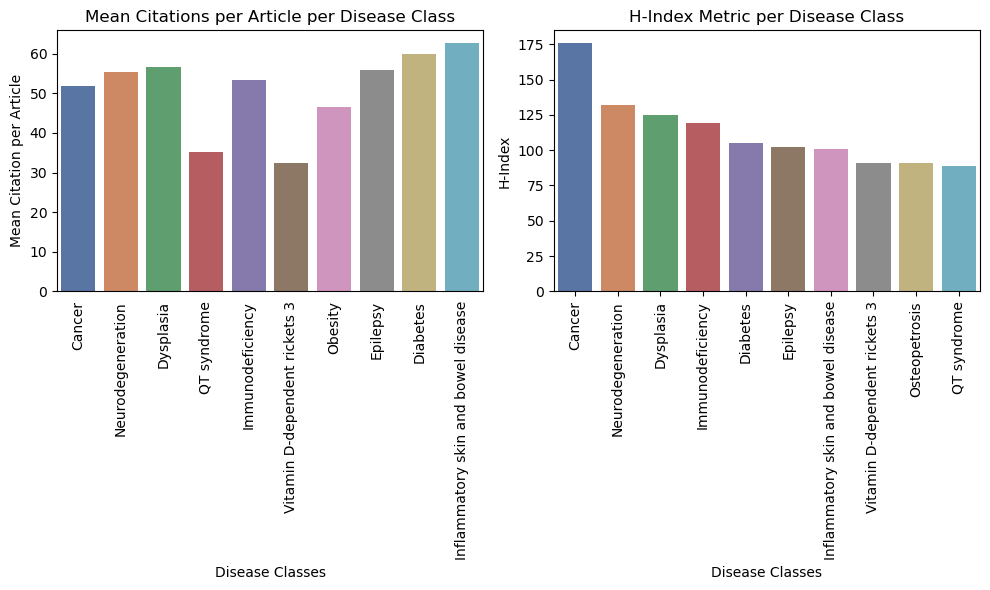

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(
    data=disease_citations_df.head(10),
    x="Disease Classes",
    y="Mean Citation per Article",
    palette="deep",
    ax=axes[0],
)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Mean Citations per Article per Disease Class")
axes[0].tick_params(axis="x", which="both", bottom=False)

# Adapting color palette for second plot so it matches the first (same diseases have same color)
deep_palette = sns.color_palette("deep", len(disease_citations_df.head(10)))
adapted_palette = []
for disease_class in disease_h_index_df.head(10)["Disease Classes"].values:
    clr = np.where(
        disease_h_index_df.head(10)["Disease Classes"].values == disease_class
    )[0][0]
    adapted_palette.append(deep_palette[clr])
else:
    adapted_palette.append(sns.color_palette("Set2", 1)[0])

sns.barplot(
    data=disease_h_index_df.head(10),
    x="Disease Classes",
    y="H-Index",
    palette=adapted_palette,
    ax=axes[1],
)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("H-Index Metric per Disease Class")

plt.tight_layout()
plt.show()

In [20]:
colors = ['#6baed6']
fig = px.bar(
    disease_h_index_df[0:10],
    x="H-Index",
    y="Disease Classes",
    orientation='h',
    title="H-Index per Disease Class",
    log_x=True,
    color_discrete_sequence=colors
)
fig.update_layout(
    yaxis_title="Disease Classes",
    title_x=0.5,
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark"
)
fig.update_yaxes(categoryorder="total ascending")
fig.show()

In [21]:
# custom_style = """
# <style>
#   body, html {
#     background-color: rgb(34, 37, 41);
#   }
# </style>
# """

# # Save the HTML file and inject the custom style
# html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# # Insert the style in the <head>
# html_content = html_content.replace("</head>", f"{custom_style}</head>")

# # Write to a file
# with open("HIndex_Disease.html", "w") as f:
#     f.write(html_content)
# fig.write_image("HIndex_Disease.svg")

### Timeseries:

In [22]:
disease_years_df = timeseries_citations_diseases(citations_dict, disease_dois)
diseases_top_10 = disease_years_df.head(10)
disease_years_expanded = []
for _, row in diseases_top_10.iterrows():
    disease_class = row["Disease Classes"]
    years = row["Publication Years"]
    citations = row["Citations"]
    for year, citation in zip(years, citations):
        disease_years_expanded.append(
            {"Year": year, "Disease Classes": disease_class, "Citations": citation}
        )
expanded_df = pd.DataFrame(disease_years_expanded)
aggregated_df = expanded_df.groupby(["Year", "Disease Classes"], as_index=False)[
    "Citations"
].sum()
fig = px.area(
    aggregated_df,
    x="Year",
    y="Citations",
    color="Disease Classes",
    line_group="Disease Classes",
    title="Citations Over Time by Disease Class",
    labels={"Year": "Publication Year", "Citations": "Citation Count"},
)
fig.update_layout(title_x=0.5, plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark")
fig.show()

In [23]:
# custom_style = """
# <style>
#   body, html {
#     background-color: rgb(34, 37, 41);
#   }
# </style>
# """

# # Save the HTML file and inject the custom style
# html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# # Insert the style in the <head>
# html_content = html_content.replace("</head>", f"{custom_style}</head>")

# # Write to a file
# with open("Timeseries_Citations_Diseases.html", "w") as f:
#     f.write(html_content)

# fig.write_image("Timeseries_Citations_Diseases.svg")